## Install and load packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%capture
!pip install -r ../requirements.txt


In [1]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
from pmlb import fetch_data
from statistics import mean

In [4]:

import pandas as pd
import numpy as np
dutch = pd.read_csv('../Data/dutch.csv')
X=dutch.drop(columns=[ 'occupation'])
y = dutch.loc[:, 'occupation']
X['sex']=[1 if X.loc[i,'sex']=='female' else 0 for i in range(len(X))]
good_outcome=1
bad_outcome=0
sens_var='sex'
sensitive_value=1
y.value_counts(normalize=True)

occupation
0    0.523949
1    0.476051
Name: proportion, dtype: float64

In [6]:
%run "../functions/clean_functions.py"

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
pip install 'aif360[FairAdapt]'
pip install 'aif360[LFR]'


In [7]:
model='xgb'
test_results, val_results=run_constraints_xgb(X,y, sens_var, sensitive_value)
test_metrics=run_all_results_clean(test_results, val_results, good_outcome)

Run biased model
The AUC of the biased model (validation set) is: 0.9154122116605548
The AUC of the biased model (test set) is: 0.9168677543123784
The AUC of the biased model for the protected group (validation set) is: 0.9070971745092241
The AUC of the biased model for the privileged group (validation set) is: 0.8899808202932121
The AUC of the biased model for the protected group (test set) is: 0.9143259415279836
The AUC of the biased model for the privileged group (test set) is: 0.8844025092948677
Calculate demographic parity


100%|██████████| 100/100 [01:08<00:00,  1.46it/s]


Calculate equality of opportunity


100%|██████████| 100/100 [56:35<00:00, 33.95s/it]


Calculate accuracy


100%|██████████| 100/100 [00:00<00:00, 880.72it/s]


Calculate precision


100%|██████████| 100/100 [00:00<00:00, 247.35it/s]


Calculate recall


100%|██████████| 100/100 [00:00<00:00, 342.37it/s]


In [8]:
print('Percentage of people in the protected group {}'.format(test_results.protected.mean()))
print('Percentage of people with the target value {}'.format(test_results.target.mean()))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


Percentage of people in the protected group 0.5010261502813638
Percentage of people with the target value 0.47600132406487916
The base rate disparity is 0.29854558596196745


In [19]:
# cost rounded to 3 digits after the comma
print('precision')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))
print('recall')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_eo'])])))
print('accuracy')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_eo'])])))

precision
The average cost of fairness (DP) is 0.028
The average cost of fairness (EO) is 0.007
recall
The average cost of fairness (DP) is 0.028
The average cost of fairness (EO) is 0.008
accuracy
The average cost of fairness (DP) is 0.026
The average cost of fairness (EO) is 0.008


In [20]:
# save results
import pickle

with open(f'Results/Dutch_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open(f'Results/Dutch_test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)

## Read results and visualize

In [11]:
# read results
import pickle
test_results = pd.read_pickle('Results/Dutch_test_results.pkl')
test_metrics = pd.read_pickle('Results/Dutch_test_metrics.pkl')

In [4]:
%run "../visualisations.py"

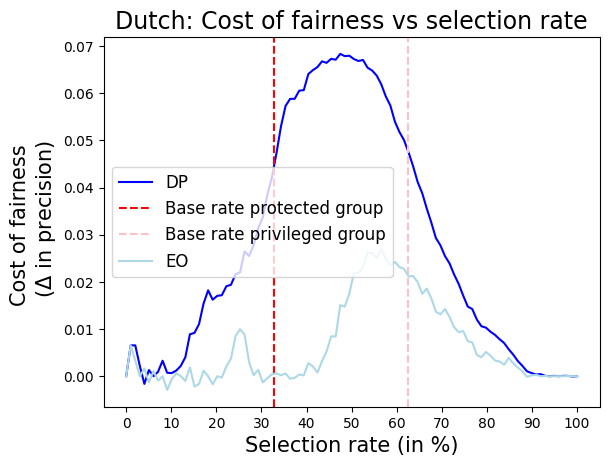

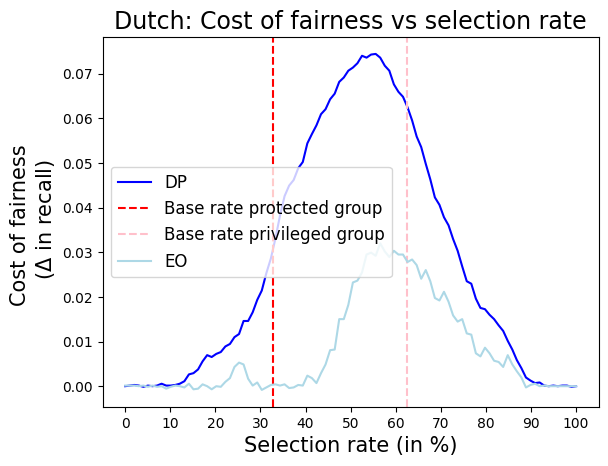

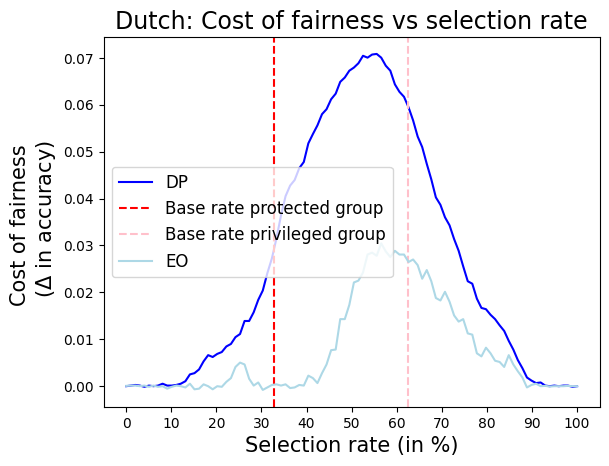

In [13]:
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
dataset='Dutch'
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')   
plot_cost(test_metrics['rec_unfair'],test_metrics['rec_dp'],C_list, test_results, 'recall', 'DP', dataset, test_metrics['rec_eo'], 'EO') 
plot_cost(test_metrics['acc_unfair'],test_metrics['acc_dp'],C_list, test_results, 'accuracy', 'DP', dataset, test_metrics['acc_eo'], 'EO') 